In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Set the working directory (equivalent to setwd in R)
import os

os.chdir("/Users/ailicic/Documents/itba_dm/")

In [47]:

# Load the dataset
dataset = pd.read_csv("./datasets/dataset_pequeno.csv")

# Define the training and application datasets
dtrain = dataset[dataset['foto_mes'] == 202107]
dapply = dataset[dataset['foto_mes'] == 202109]

# Define the features and target variable
X_train = dtrain.drop(columns=['clase_ternaria'])
y_train = dtrain['clase_ternaria']

/var/folders/rg/rz0f5zr10czg24dpzts00svc0000gn/T/ipykernel_12135/1231393308.py:2: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("./datasets/dataset_pequeno.csv")


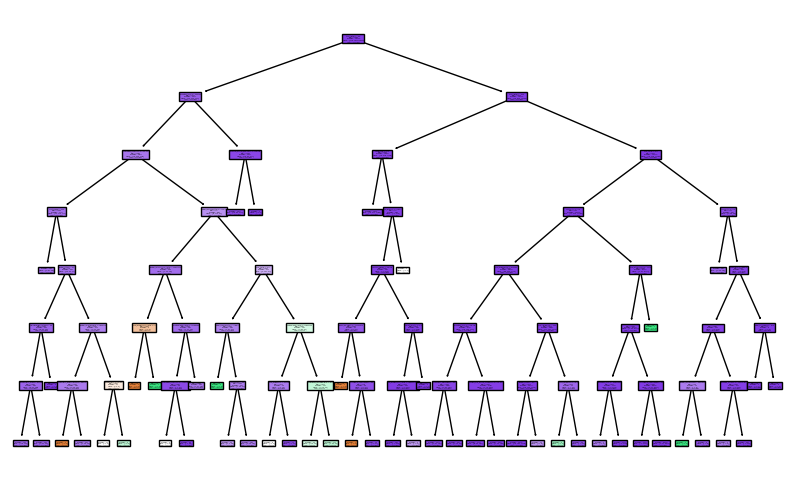

In [29]:
# Generate the model (decision tree)
model = DecisionTreeClassifier(
    criterion='gini',  # You can use 'entropy' if needed
    splitter='best',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1
)

# Fit the model to the training data
model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=X_train.columns.to_list(), class_names=["BAJA+1", "BAJA+2", "CONTINUA"])
plt.show()

# Apply the model to new data
X_apply = dapply.drop(columns=['clase_ternaria'])
probabilities = model.predict_proba(X_apply)


In [48]:
#Drop na


In [49]:
#Do a grid search
from sklearn.model_selection import GridSearchCV
#Train - test split
from sklearn.model_selection import train_test_split
#Metrics

# Define the training and application datasets
dtrain = dataset[dataset['foto_mes'] == 202107]
dapply = dataset[dataset['foto_mes'] == 202109]
dapply = dapply.dropna(how='any',axis=0)

# Define the features and target variable
X = dtrain.drop(columns=['clase_ternaria'])
y = dtrain['clase_ternaria']

# Define the features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Plot the decision tree
plt.figure(figsize=(10, 6))


# Define the parameters to be tested
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Define the grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Execute the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


<Figure size 1000x600 with 0 Axes>

In [ ]:
# Execute the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = grid_search.best_params_
print(best_parameters)


In [30]:
# Add a new column to dapply with the probability of "BAJA+2"
dapply['prob_baja2'] = probabilities[:, 1]

# Only keep records with "BAJA+2" probability greater than 1/40
dapply['Predicted'] = (dapply['prob_baja2'] > 1 / 40).astype(int)

# Create the directory for Kaggle experiment
os.makedirs("./exp/KA2001", exist_ok=True)

# Save only the necessary columns for Kaggle
dapply[['numero_de_cliente', 'Predicted']].to_csv("./exp/KA2001/K101_001.csv", sep=",", index=False)

/var/folders/rg/rz0f5zr10czg24dpzts00svc0000gn/T/ipykernel_12135/3860779087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dapply['prob_baja2'] = probabilities[:, 1]
/var/folders/rg/rz0f5zr10czg24dpzts00svc0000gn/T/ipykernel_12135/3860779087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dapply['Predicted'] = (dapply['prob_baja2'] > 1 / 40).astype(int)
